# Assignment 4
57584800 WANG Guanzhang 05/03/2023

**<font color='blue'>References:</font>**

1. Sklearn library. https://scikit-learn.org/stable/
2. Matplotlib. https://matplotlib.org/
3. Seaborn. https://seaborn.pydata.org/

## 1. use f_classif as your evaluation measurement and redo the feature selection in Univariate feature selection. what does "f_classif" represent? Is this a filter model or wrapper model? (10 points). 

In [1]:
from sklearn.feature_selection import SelectKBest   
#the "SelectKBest" removes all but the top K highest scoring features

from sklearn.feature_selection import f_classif 
# the "f_classif" Computes the ANOVA F-value for the provided sample.

import pandas as pd

iris = pd.read_csv('iris.txt',header=None)
# load the data but the data does not have table head
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class']
# set the column names as this list of texts. 
features=['sepal-L','sepal-W','petal-L','petal-W']  
# here we set a feature list to be selected from the data table 
target=['class'] 
# the column "class" will be selected as the target variable.
X=iris[features] 
# using this code, we define a variable "X" to store the feature set. 
#Please note the "feature" in "iris[feature]" represents the feature definded in the first row. 
y=iris[target] 
# similar to getting "X", we get the "y" from the target column ("class")

# start choose the features
# Step 1: define a feature selection model and specify the parameters
my_model=SelectKBest(f_classif, k=2)   
# Step 2: use the model to fit the data and transform the feature set "X" to a new selected feature "X_new"
X_new=my_model.fit(X,y.values.ravel())
# modified the tutorial code to elimate the error 

import numpy as num
#make a decent output
selectFeatures = num.array(features)[X_new.get_support()]
#get selected features
for feature in selectFeatures:
    print(feature)
# you get a new feature set of dimension k=2

petal-L
petal-W


The **"f_classif"** Computes the ANOVA F-value for the provided sample.

This is a filter model. When selecting, only the correlation between variables and predicted values ​​are evaluated, so it excludes the most irrelevant variables because the relationship between variables is not considered.

## 2. Explain the differences among univariate feature selection, SelectFromModel method, and PCA. (10 points)

### Univariate feature selection
    It works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:
    
1. **<font color = "skyblue">SelectKBest</font>** removes all but the *k* highest scoring features

2. **<font color = "skyblue">SelectPercentile</font>** removes all but a user-specified highest scoring percentage of features

3. using common univariate statistical tests for each feature: false positive rate **<font color = "skyblue">SelectFpr</font>**, false discovery rate **<font color = "skyblue">SelectFdr</font>**, or family wise error **<font color = "skyblue">SelectFwe</font>**.

4. **<font color = "skyblue">GenericUnivariateSelect</font>** allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

### SelectFromModel method
    SelectFromModel is a meta-transformer that can be used alongside any estimator that assigns importance to each feature through a specific attribute (such as coef_, feature_importances_) or via an importance_getter callable after fitting. 
    
    The features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”. 
    
    In combination with the threshold criteria, one can use the max_features parameter to set a limit on the number of features to select.

### Principal Components Analysis
    Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data。

**In a nutshell, Univariate Feature Selection is choosing the features given the univariate statistical test.The SelectFromModel method references the standard defined by the analyst. Both of them are feature selection methods. PCA is trying to project all the features into different "principal components", is a feature reduction method.**

## 3. Read documentation of "SequentialFeatureSelector" and use it to select the top TWO features. What is the mechnism of this tool? What are these two optimal features? (40 points)

document: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

Sequential Feature Selection (SFS) is available in the SequentialFeatureSelector transformer. SFS can be either forward or backward:

- Forward-SFS is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

- Backward-SFS follows the same idea but works in the opposite direction: instead of starting with no features and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.

SFS differs from RFE and SelectFromModel in that it does not require the underlying model to expose a coef_ or feature_importances_ attribute. It may however be slower considering that more models need to be evaluated, compared to the other approaches. For example in backward selection, the iteration going from m features to m - 1 features using k-fold cross-validation requires fitting m * k models, while RFE would require only a single fit, and SelectFromModel always just does a single fit and requires no iterations.

**<font color = "skyblue">Code: </font>**

In [2]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
sfs.fit(X, y.values.ravel())

selectFeatures = num.array(features)[sfs.get_support()]

for feature in selectFeatures:
    print(feature)


sepal-L
petal-W


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

**The Sepal-L and Petal-W has been chosen.**

## 4. Find a new dataset and use ONE of the templates to do feature selection or reduction. Reduce the data dimension to Two. Please scatter plot your optimal feature set and interpret. (40 points)



In this question, The swiss banknote dataset will be used.

This is a dataset from mixGHD of the R package, and a CSV format document is available for the modelling

reference: https://search.r-project.org/CRAN/refmans/MixGHD/html/banknote.html

In [3]:
bank = pd.read_csv("Swiss-Bank-Notes.csv")
print(bank.columns)
notes_feature = ['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']
X = bank[notes_feature]

Index(['conterfeit', 'Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal'], dtype='object')


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Alternatively, you can use the "fit_transform" directly to do the previous block.
z=pca.fit_transform(X)
display(z[:5,:])

array([[-0.5496481 ,  0.50637301],
       [-2.01862924,  0.66126364],
       [-1.83567546,  1.17530734],
       [-2.49436724, -0.11889156],
       [-0.70132282,  3.19476668]])

In [5]:
bank['z1'] = z[:,0]
bank['z2'] = z[:,1]
bank.loc[bank.conterfeit == 0, 'conterfeit'] = 'counterfeit'
bank.loc[bank.conterfeit == 1, 'conterfeit'] = 'genuine'
bank

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal,z1,z2
0,counterfeit,214.8,131.0,131.1,9.0,9.7,141.0,-0.549648,0.506373
1,counterfeit,214.6,129.7,129.7,8.1,9.5,141.7,-2.018629,0.661264
2,counterfeit,214.8,129.7,129.7,8.7,9.6,142.2,-1.835675,1.175307
3,counterfeit,214.8,129.7,129.6,7.5,10.4,142.0,-2.494367,-0.118892
4,counterfeit,215.0,129.6,129.7,10.4,7.7,141.8,-0.701323,3.194767
...,...,...,...,...,...,...,...,...,...
195,genuine,215.0,130.4,130.3,9.9,12.1,139.6,1.249123,-1.159365
196,genuine,215.1,130.3,129.9,10.3,11.5,139.7,1.306226,-0.457122
197,genuine,214.8,130.3,130.4,10.6,11.1,140.0,1.365068,0.092151
198,genuine,214.7,130.7,130.8,11.2,11.2,139.4,2.298487,0.016919


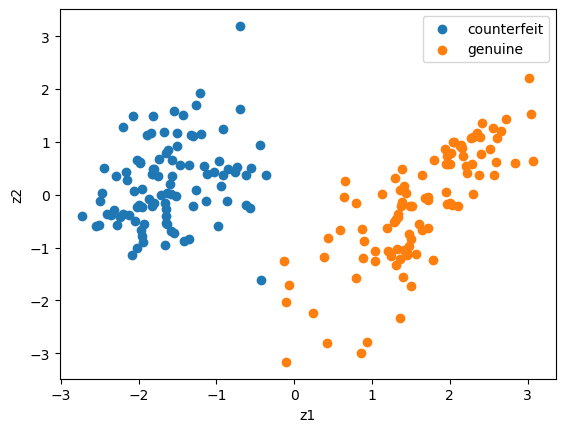

In [6]:
import matplotlib.pyplot as plt # Please check tutorial 2 for details.
groups = bank.groupby("conterfeit")
for name, group in groups:
    plt.scatter(group['z1'],group['z2'], marker="o", label=name)
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend()
plt.show()

**The genuine and counterfeit notes have been divided nearly perfectly by 2 Principle Components**